## <center><font style='font-family:new' color='aazzzz'>Anàlisi del Desplaçament al Vermell de SNeIa per la quantificació d'Energia Fosca</font></center><br>

El 1998, Saul Perlmutter, Brian Schmidt and Adam Reiss van confirmar irrefutablement l'existènica de _Dark Energy_ (d'acord amb els models astronòmics que acceptem actualment).<br>
L'equip de Saul va mesurar el redshift ($z$, o desplaçament al vermell) i la magnitud efectiva (o brillantor que observem des de la Terra) d'algunes <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">Supernoves del tipus Ia</a> (SNeIa).

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy #llibreria d'on importarem el model del nostre univers
from astropy.cosmology import FlatLambdaCDM

Emprarem les dades publicades a l'article de Saul Perlmutter et al: <a href="https://arxiv.org/pdf/astro-ph/9812133.pdf">"MEASUREMENTS OF $\Omega$ AND $\Lambda$ FROM 42 HIGH-REDSHIFT SUPERNOVAE"</a>. Més concretament, emprarem les que es troben a la taula 1 (SCP SNE IA DATA): 
* Columna 2: $z$, geocentric redshift of supernova or host galaxy
* Columna 9: Stretch-luminosity corrected effective B-band peak magnitude

In [2]:
# tenim un arxiu en local amb les dades copiades del seu article
# l'importem per reading amb el nom 'dades'
with open('./practiques/perlmutter.txt', "r") as dades:
    dat = pd.read_csv(dades, names=['z', 'Magnitud efectiva'], comment='#', sep='\s+')

toprint = dat[:10] #les 10 primeres files de dades
toprint #les imprimim per veure que les nostres dades les hem guardat correctament

,z,Magnitud efectiva
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55
5,0.372,22.26
6,0.378,22.58
7,0.453,23.17
8,0.465,23.33
9,0.498,23.71


Un cop comprovem que podem llegir les dades correctament, podem calcular quina quantitat d'<b>energia fosca</b> hi ha a l'univers.<br> En primer lloc, necessitem un model que ens descrigui el desplaçament al vermell (redshift) de cada supernova en funció de la distància (la sabem a partir de la lluminositat de cada SN).<br>Donada una certa quantitat d'aquesta energia fosca, emprem $\Omega_\Lambda$ per denotar la _fracció_ de tota la matèria que es comporta com Dark Energy.

In [3]:
def lumdist(z, olambda):
    '''
    Per aquest càlcul prenem:
        Constant de Hubble: 70 (km/s)/Mpc
        Omega matter (densitat de matèria no relativística): 1
        Temperatura de CMB (Cosmic microwave background): 2.725 K
    Paràmetres d'entrada:
        z: redshift
        olambda: la fracció de tota la matèria que es comporta com Dark Energy
    Sortida:
        'Distància lumínica' en Mpc a un redshift donat
    '''
    cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    return  cosmo.luminosity_distance(z)

In [4]:
def effmag(z, olambda, MB):
    '''
    Necessitem convertir la distància en la forma en la qual els astrònoms mesuren la brillantor
    Paràmetres d'entrada:
        z: redshift
        olambda: la fracció de tota la matèria que es comporta com Dark Energy
        MB: magnitud absoluta d'una estrella; B indica que estem referint-nos a la part de
        radiació estelar que s'emet a la part de “blau” de l'espectre
    Sortida:
        Magnitud efectiva, en el cas de SNeIa correspon equivalentment amb la distància (per standard
        candles, quan més tènue veiem un d'aquests objectes, més allunyat es troba de nosaltres)
    '''
    DL = lumdist(z, olambda) #emprem la funció anterior
    return MB + 5. * np.log10(DL.value) #calculem a partir de la magnitud absoluta i la distància lumínica

(13.0, 25.0)

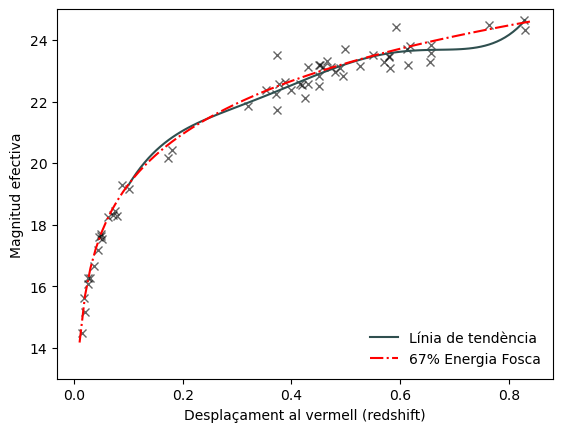

In [5]:
# plot on eix x és el redshift i l'eix y la lluminositat, equivalent a la distància
# marquem amb 'x' de color negre i amb certa transparència on són les nostres supernoves
pl.plot(dat['z'], dat['Magnitud efectiva'], marker='x', color='k', lw=0.0, alpha=0.6)

#anomenem els nostres eixos
pl.xlabel('Desplaçament al vermell (redshift)')
pl.ylabel('Magnitud efectiva')

#calculate equation for quartic trendline
z = np.polyfit(dat['z'],dat['Magnitud efectiva'] , 5)
p = np.poly1d(z)

x = np.linspace(0.1,0.83,100) #fem les divisions que considerem necessàries entre els valors pels quals tenim dades

# afegim la trendline a la gràfica
plt.plot(x, p(x), 'darkslategrey', label='Línia de tendència')

zs = np.arange(0.01, 0.85, 0.01)
#energia fosca que afegim al nostre univers creat amb Python
pl.plot(zs, effmag(zs, 0.67, 6.), c='r', label='67% Energia Fosca', linestyle='dashdot') 
pl.legend(loc=4, frameon=False) #mostrem una llegenda descrivint el plot amb els labels

#per aquest cas, hem de definir la zona que volem visualitzar de la nostra funció
plt.ylim(13,25)

Pel mètode dels mínims quadrats, per aquest percentatge la línia descrita pel programa és la que millor s'apropa a la realitat ( a la línia de tendència descrita per una equació de grau quatre).<br>
D'aquesta forma, acabem de calcular aproximadament la quantitat d'energia fosca que composa el nostre univers d'acord amb les teories acceptades en l'actualitat. Determinem així el potencial que té Python, atès que amb 5 llibreries de Python i unes 30 línies de codi hem pogut arribar a la mateixa conclusió que el grup d'astrònoms que van ser otorgats el Premi Nobel de Física el 2011.